In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [2]:
#import train set
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
# To solve downloading files.
## https://github.com/tensorflow/tensorflow/issues/10779
## run the /Applications/Python 3.6/Install Certificates.command bash script to install newer certs.
mnist = input_data.read_data_sets("../MNIST_data/", one_hot=True)
print(mnist.train.num_examples)

Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz
55000


In [5]:
# 0 ~ 9까지의 숫자 갯수
nb_classes = 10

In [6]:
# MNIST Data image of shape = 28 * 28 = 784
X = tf.placeholder(tf.float32, shape=[None, 784])
Y = tf.placeholder(tf.float32, shape=[None, nb_classes]) # one-hot으로 주어짐.

In [7]:
W = tf.Variable(tf.random_normal([784, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

In [8]:
# hypothesis
hypothesis = tf.matmul(X, W) + b

In [10]:
# Cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=Y))

In [17]:
# Minimize Cost
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

In [18]:
# Correct prediction Test model
prediction = tf.argmax(hypothesis, 1)
real = tf.argmax(Y, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, real), dtype=tf.float32))

In [19]:
# Prepare session
session = tf.Session()
session.run(tf.global_variables_initializer())

In [20]:
# Slice the data, epochs, batch_size
training_epochs = 15
batch_size = 100
total_iterator = int(mnist.train.num_examples / batch_size)
print(mnist.train.num_examples)
print(total_iterator)

55000
550


In [21]:
# Fit the train
for epoch in range(training_epochs):
    avg_cost = 0
    total_iterator = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_iterator):
        batch_x_train, batch_y_train = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_x_train, Y: batch_y_train}
        c_val, _ = session.run([cost, train], feed_dict=feed_dict)
        avg_cost += c_val / batch_size
        
    print("Epoch:", "%04d" % (epoch + 1), ", Cost:", "{:.5f}".format(avg_cost))

print('Learning Finished!')    

print("Accuracy:", session.run(accuracy,
                               feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Epoch: 0001 , Cost: 7.23157
Epoch: 0002 , Cost: 2.76504
Epoch: 0003 , Cost: 2.29031
Epoch: 0004 , Cost: 2.06248
Epoch: 0005 , Cost: 1.91016
Epoch: 0006 , Cost: 1.84359
Epoch: 0007 , Cost: 1.77100
Epoch: 0008 , Cost: 1.69986
Epoch: 0009 , Cost: 1.66387
Epoch: 0010 , Cost: 1.62996
Epoch: 0011 , Cost: 1.60033
Epoch: 0012 , Cost: 1.57960
Epoch: 0013 , Cost: 1.55810
Epoch: 0014 , Cost: 1.53309
Epoch: 0015 , Cost: 1.53425
Learning Finished!
Accuracy: 0.9186


1221
Label:  [5]
Prediction:  [5]


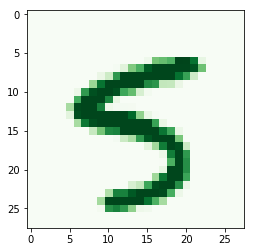

In [23]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print(r)
print("Label: ", session.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))

sample_image = mnist.test.images[r: r+1]
print("Prediction: ", session.run(tf.argmax(hypothesis, 1),
                                  feed_dict={X: sample_image}))

plt.imshow(
    sample_image.reshape(28, 28),
    cmap='Greens',
    interpolation='nearest')
plt.show()